In [72]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [73]:
# !pip install --upgrade statsmodels

In [74]:
# !python -m pip install --upgrade pip

In [75]:
# import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Import Data and begin basic observations

In [76]:
# import data set
# identify if there are missing values
missing_value_formats = ["x",'']
df = pd.read_csv('Microsoft_Stock.csv', header = 0, na_values = missing_value_formats)

In [77]:
print(df.head())

                Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438


In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB
None


In [79]:
print(df.describe())

              Open         High          Low        Close        Volume
count  1511.000000  1511.000000  1511.000000  1511.000000  1.511000e+03
mean    107.385976   108.437472   106.294533   107.422091  3.019863e+07
std      56.691333    57.382276    55.977155    56.702299  1.425266e+07
min      40.340000    40.740000    39.720000    40.290000  1.016120e+05
25%      57.860000    58.060000    57.420000    57.855000  2.136213e+07
50%      93.990000    95.100000    92.920000    93.860000  2.662962e+07
75%     139.440000   140.325000   137.825000   138.965000  3.431962e+07
max     245.030000   246.130000   242.920000   244.990000  1.352271e+08


In [80]:
print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


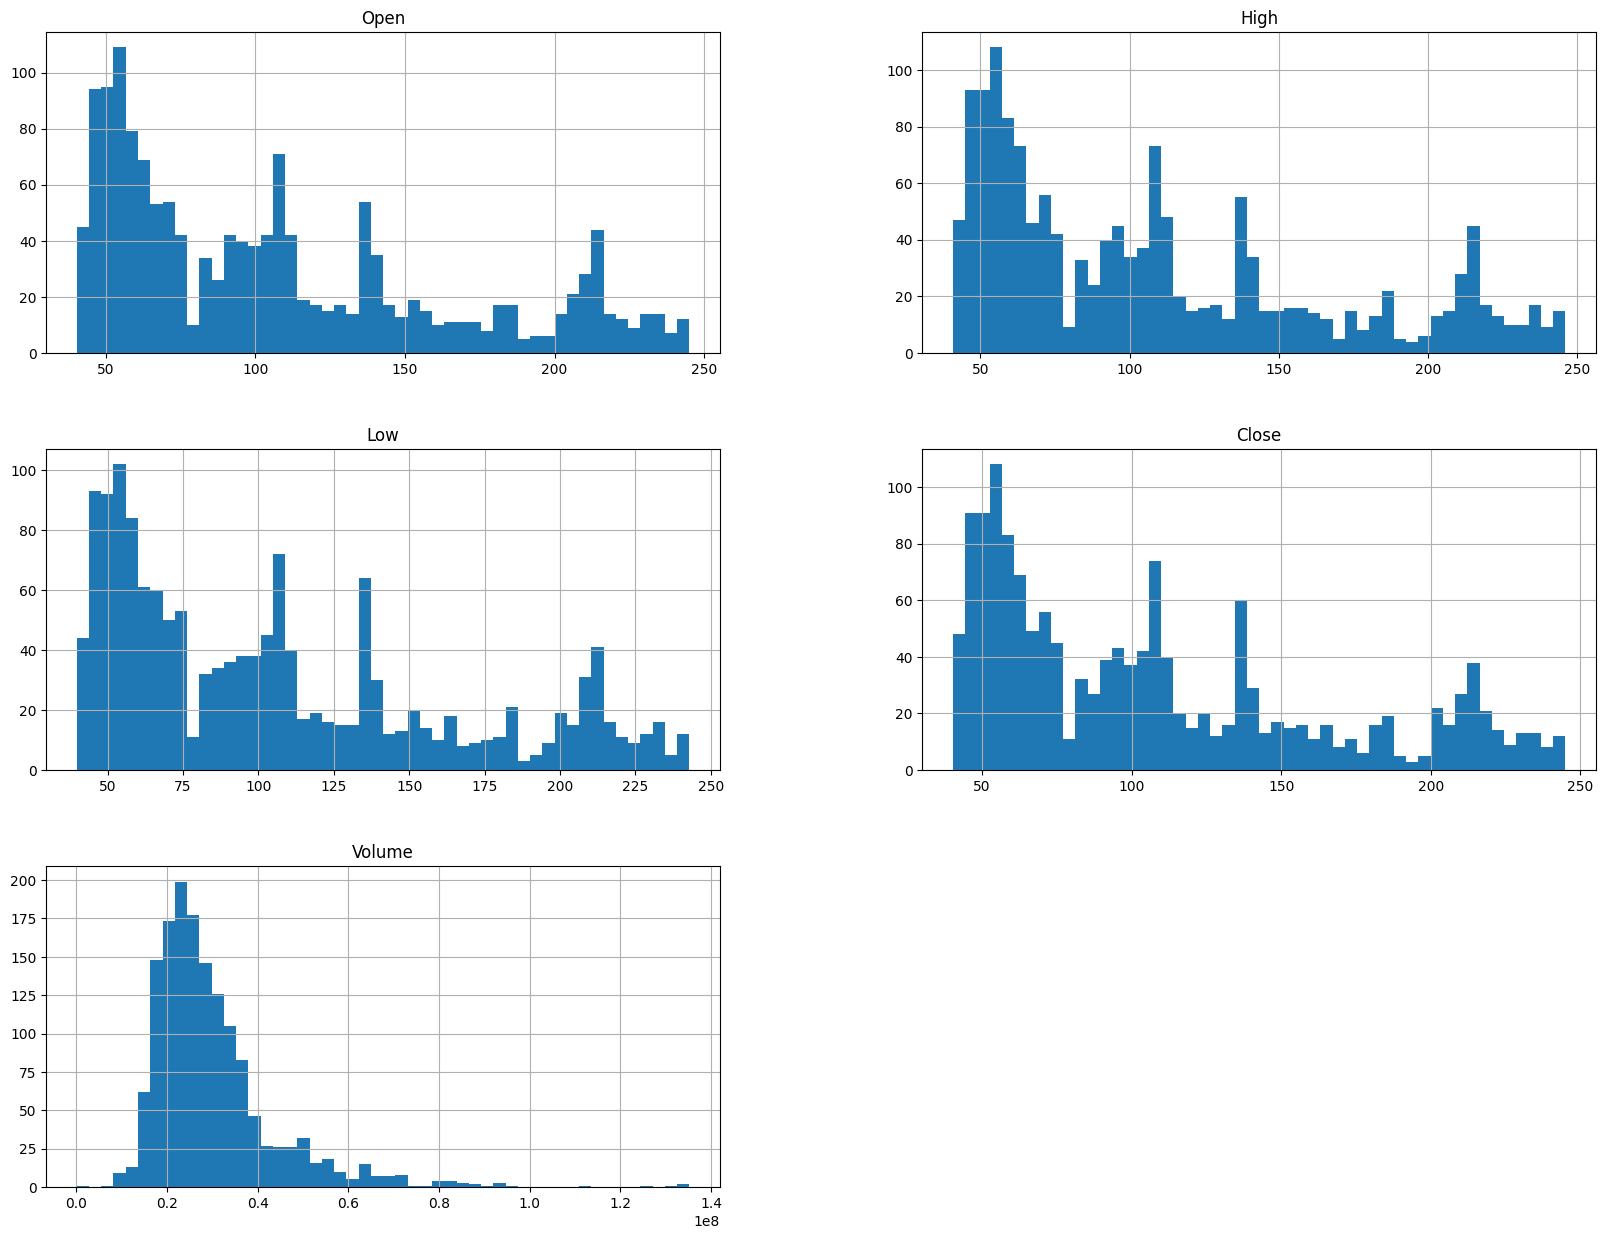

In [81]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [82]:
# Convert the 'Date' column in the DataFrame df to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of df
df.set_index('Date', inplace=True)

# new 'time_series' create 'Close' column 
time_series = df['Close'] 

In [83]:
# Augmented Dickey-Fuller test
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
test_stationarity(time_series)

Results of Dickey-Fuller Test:
Test Statistic                    1.737136
p-value                           0.998216
#Lags Used                       24.000000
Number of Observations Used    1486.000000
Critical Value (1%)              -3.434758
Critical Value (5%)              -2.863487
Critical Value (10%)             -2.567807
dtype: float64


The Dickey_Fuller test results show that the time series is not stationary, as thr p-value is greater than 0.05

Also the Test Statistic is greater thanthe Critical Value 

Test Statistic              =   1.737136 

Critical Value (1%)         =   -3.434758 

Critical Value (5%)         =   -2.863487

Critical Value (10%)        =   -2.567807


Will use differencing to stabalise the data prior to runing Arima etc.

In [84]:
# Differencing the time_series to ensure the data is stationary prior to modelling
diff_time_series = time_series.diff().dropna()

# Run test again
test_stationarity(diff_time_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.003833e+01
p-value                        1.519594e-17
#Lags Used                     2.400000e+01
Number of Observations Used    1.485000e+03
Critical Value (1%)           -3.434761e+00
Critical Value (5%)           -2.863488e+00
Critical Value (10%)          -2.567807e+00
dtype: float64


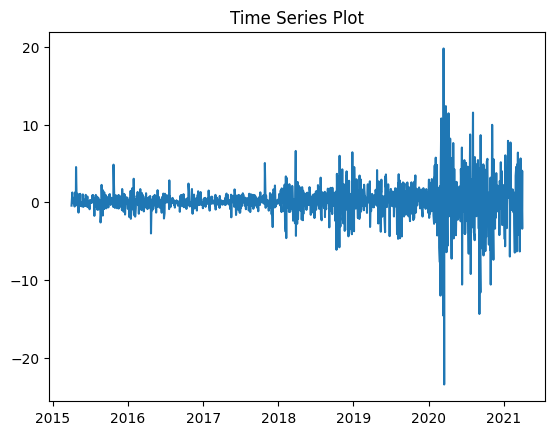

In [85]:
# Plotting the time_series and diff_time_series
plt.plot(diff_time_series)
plt.title('Time Series Plot')
plt.show()

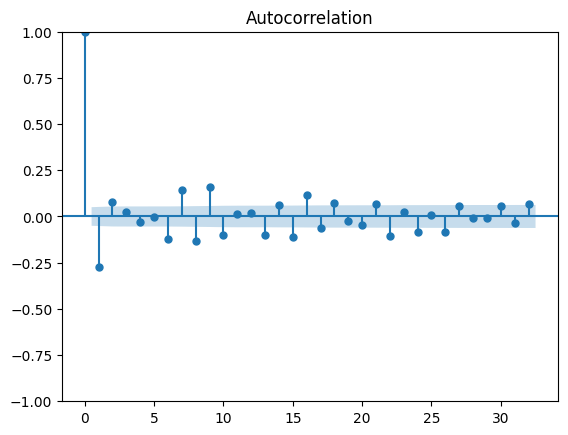

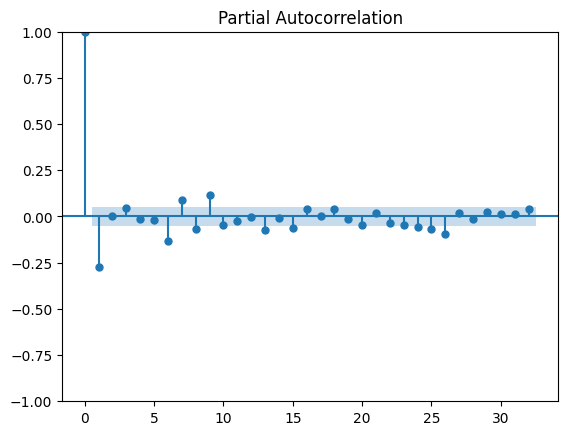

In [86]:
#Plotting the ACF and PACF for diff_time_series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(diff_time_series)
plot_pacf(diff_time_series)
plt.show()

Text(0.5, 1.0, 'RSS: 9421.2645')

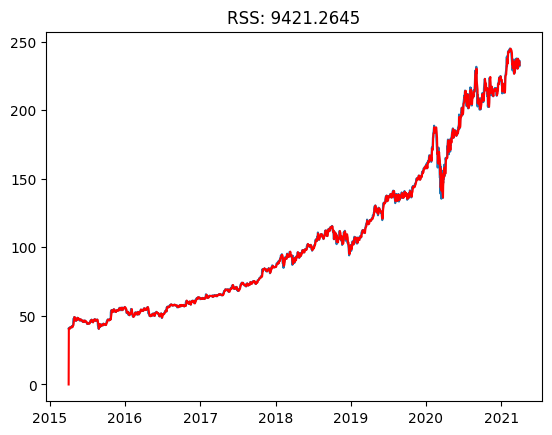

In [87]:
model = ARIMA(df['Close'], order=(5,1,0))
results_ARIMA = model.fit()
plt.plot(df['Close'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df['Close'])**2))

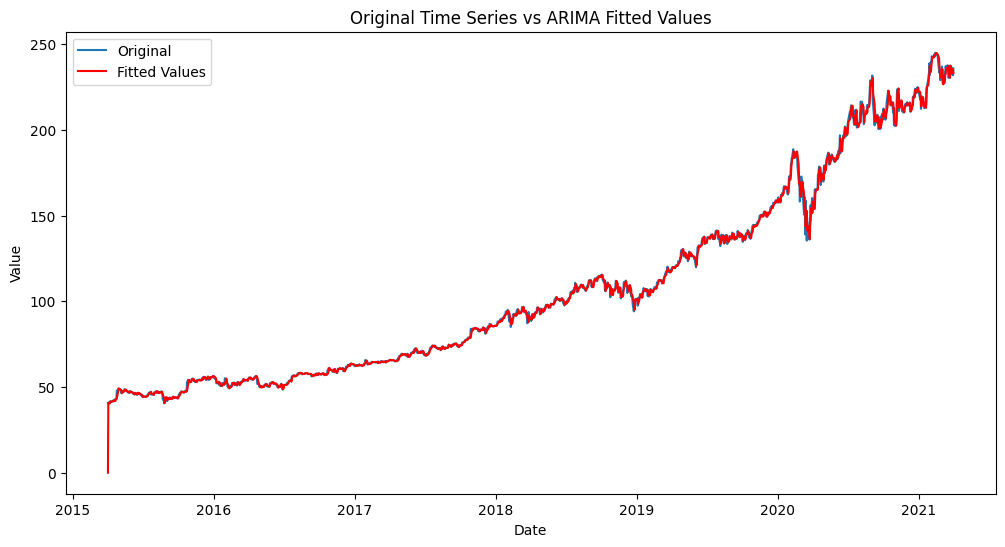

In [88]:
plt.figure(figsize=(12,6))
plt.plot(time_series, label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values')
plt.title('Original Time Series vs ARIMA Fitted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Text(0.5, 1.0, 'RSS: 9421.2645')

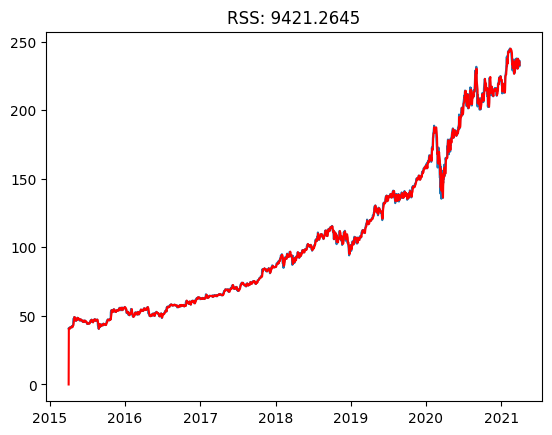

In [89]:
model = ARIMA(df['Close'], order=(5,1,0))
results_ARIMA = model.fit()
plt.plot(df['Close'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df['Close'])**2))

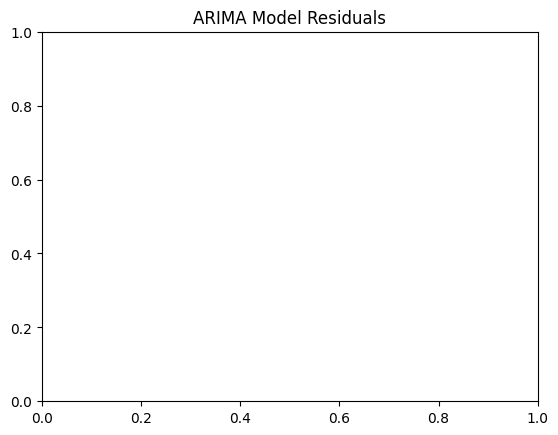

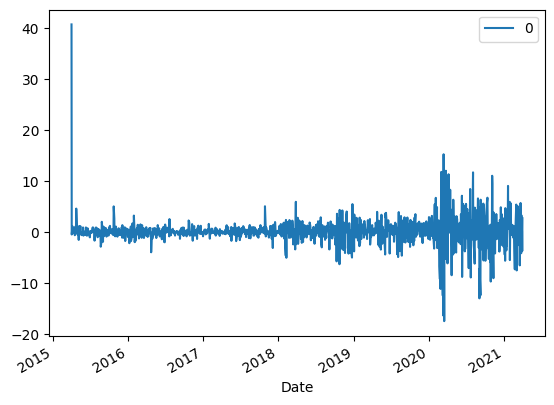

<Figure size 640x480 with 0 Axes>

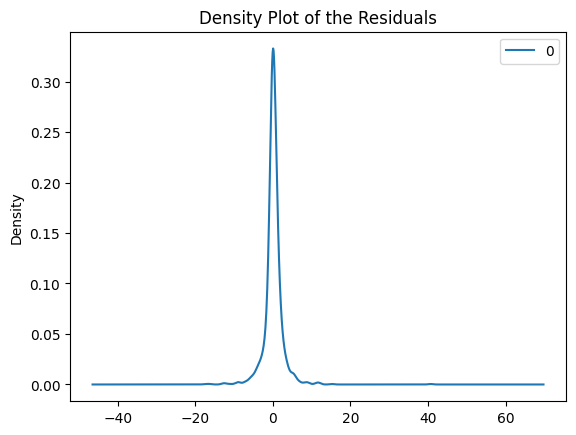

                 0
count  1511.000000
mean      0.183996
std       2.491058
min     -17.401024
25%      -0.465387
50%       0.114328
75%       0.909683
max      40.720000


In [90]:
# Check residuals for model adequacy
residuals = pd.DataFrame(results_ARIMA.resid)
plt.figure()
plt.title('ARIMA Model Residuals')
residuals.plot()
plt.show()

plt.figure()
residuals.plot(kind='kde')
plt.title('Density Plot of the Residuals')
plt.show()

print(residuals.describe())


In [91]:
# Forecasting
forecast_steps = 10
forecast_results = results_ARIMA.get_forecast(steps=forecast_steps)
forecast = forecast_results.predicted_mean

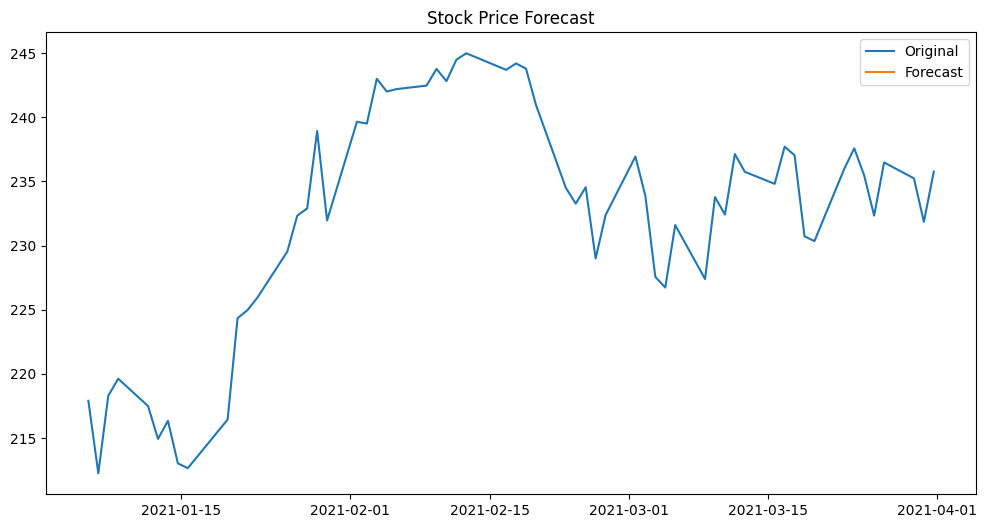

In [92]:
# Plotting Forecast
plt.figure(figsize=(12,6))
plt.plot(time_series[-60:], label='Original')  # Plot the last 60 data points for context
plt.plot(pd.Series(forecast, index=time_series.index[-forecast_steps:]), label='Forecast')
plt.legend()
plt.title('Stock Price Forecast')
plt.show()

In [93]:
# Calculate forecast errors
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

true_values = df['Close'][-forecast_steps:]  # Assuming you have true values for the forecast period
mse = mean_squared_error(true_values, forecast)
mae = mean_absolute_error(true_values, forecast)
rmse = math.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 2.1142149315540535
Mean Squared Error: 6.231360253537539
Root Mean Squared Error: 2.496269267033815


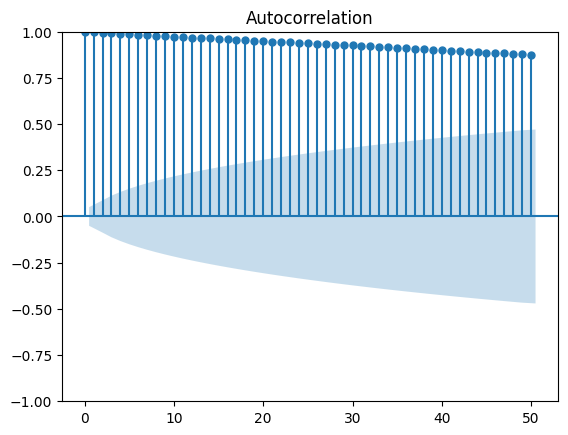

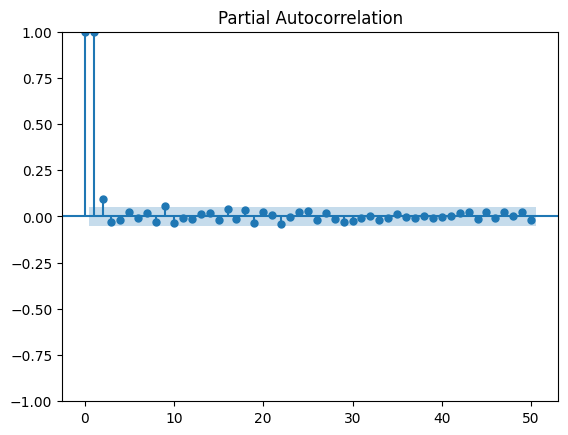

In [94]:
# Autocorrelation and Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(time_series, lags=50)
plot_pacf(time_series, lags=50)
plt.show()

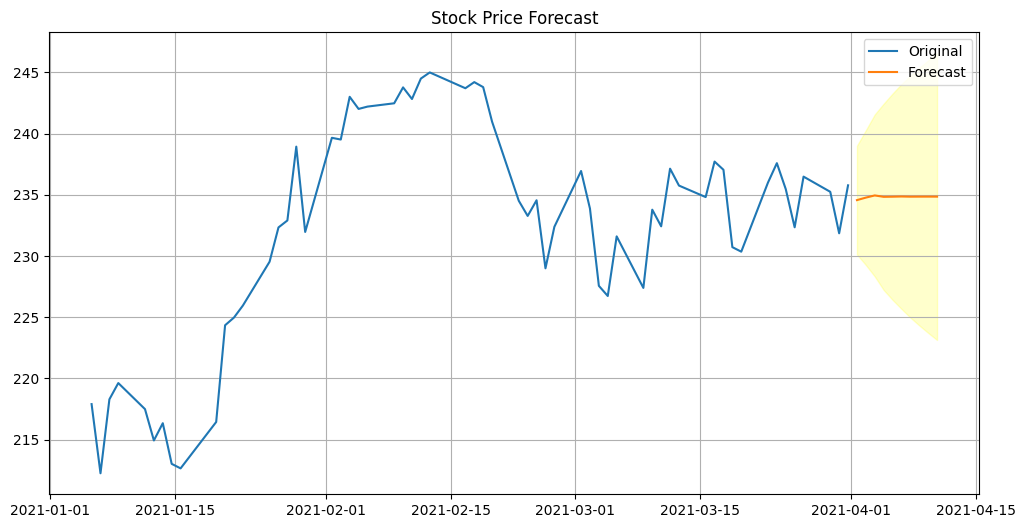

In [96]:
# Forecasting
forecast_steps = 10
forecast_results = results_ARIMA.get_forecast(steps=forecast_steps)
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Adjusting the date index for the forecast plot
last_date = time_series.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1)[1:]  # exclude the first date

# Plotting the Forecast
plt.figure(figsize=(12,6))
plt.plot(time_series[-60:], label='Original')  # Plot the last 60 data points for context
plt.plot(forecast_index, forecast, label='Forecast')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='yellow', alpha=0.2)
plt.legend()
plt.title('Stock Price Forecast')
plt.grid(True)  # This line adds grid lines to your plot
plt.show()